In [171]:
import pandas as pd
import numpy as np
import os
from six import BytesIO
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
read_path=r'I:\PG\Algorithm_Trading\HW3\VOV计算和中间文件'

In [8]:
#计算因子IC/IR
df_factor=pd.read_excel(read_path+'\风险模糊度.xlsx')

In [9]:
df_factor

,date,000006,000010,000011,000016,000018,000019,000025,000030,000032,...,688578,688586,688598,688608,688617,688680,688686,688696,688699,688788
0,2018-01-02,NaN,1.040593,0.731812,1.616106,0.547723,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-03,NaN,1.016255,0.706903,1.586177,0.603891,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-04,NaN,1.006213,0.709437,1.584627,0.582763,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-05,NaN,1.005132,0.833095,1.496844,0.582876,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-08,NaN,1.173565,0.897562,1.376110,0.582982,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,2022-12-26,2.224205,NaN,1.560265,0.222987,NaN,1.089849,1.211850,0.203204,1.906748,...,0.485035,0.392618,0.507838,0.892112,0.658034,0.792436,0.610353,0.608133,0.833919,0.417038
1211,2022-12-27,2.244545,NaN,1.545052,0.219764,NaN,1.084389,1.204863,0.202826,1.915219,...,0.489607,0.368785,0.500463,0.891522,0.568176,0.817302,0.609797,0.602489,0.834078,0.407245
1212,2022-12-28,2.584086,NaN,1.535340,0.218437,NaN,1.075592,1.215191,0.207336,1.923415,...,0.485447,0.320441,0.499934,0.881516,0.566979,0.809994,0.617526,0.607453,0.845056,0.419592
1213,2022-12-29,2.619900,NaN,1.506014,0.217643,NaN,0.875221,1.224011,0.203796,1.881756,...,0.486273,0.307867,0.493318,0.885023,0.564875,0.808060,0.622551,0.616354,0.742851,0.416871


In [22]:
###根据因子数据所涉及到的股票创建总体股票池,方便后续频繁调用
stock_list = df_factor.set_index('date').columns.tolist()
star_time=df_factor['date'].iloc[0]
end_time=df_factor['date'].iloc[-1]

In [59]:
df_factor=df_factor.set_index('date')

In [43]:
data_p=pd.read_csv(r'I:\PG\Algorithm_Trading\HW3\price.csv')

In [51]:
###导入股票股价，和股票股价格式做匹配
pricedata=data_p.copy()#防止原数据被污染
pricedata['sid']=pricedata['sid'].apply(lambda x: x[:-3])
pricedata=pricedata.set_index(['date','sid']).unstack()['close']
price_match=pricedata.loc[:,stock_list]
df_return = (price_match.shift(1)-price_match)/price_match
date_list=df_return.index

In [50]:
df_return.head(5)

sid,000006,000010,000011,000016,000018,000019,000025,000030,000032,000034,...,688578,688586,688598,688608,688617,688680,688686,688696,688699,688788
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,-0.009063,-0.003432,-0.016113,-0.038849,NaN,-0.005172,0.002199,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,0.009146,-0.000686,-0.014264,0.011122,NaN,-0.004067,0.001101,0.007850,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,-0.028468,-0.044561,-0.001540,0.009556,NaN,-0.015087,-0.002197,-0.017298,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,-0.090269,0.003947,-0.004750,0.011111,NaN,0.021271,-0.010864,0.008724,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
class data_wash:
    #去极值    
    def three_sigma(factor):
        mean = factor.mean()
        std = factor.std()
        up = mean + 3*std
        down = mean - 3*std
        return np.clip(factor,down,up)
    #标准化
    def standardize(factor):
        mean = factor.mean()
        std = factor.std()
        factor = (factor - mean)/std
        return factor

In [63]:
#调仓周期设置
n = 30
#这里创建两个临时frame用来存储每次迭代的计算结果，icn指ic_normal，icr指ic_rank（秩相关系数）
df_icn = pd.DataFrame(index=date_list,columns=['icn'])
df_icr = pd.DataFrame(index=date_list,columns=['icr'])

for i in range(0,len(df_factor)-n):
    #从因子库中取出当期的因子值，用df1来保存
    df1 = df_factor.loc[date_list[i],stock_list]
    #1.drop空值
    df1 = df1.dropna()
    #2.去极值与标准化
    df1 = data_wash.three_sigma(df1)
    df1 = data_wash.standardize(df1)
    #获取数据预处理后的总股票池
    stocks = list(df1.index)
    #计算未来收益率信息，用df2来进行临时存储
    df2 = df_return.loc[date_list[i+1]:date_list[i+n],stocks]+1
    df2 = df2.cumprod().iloc[-1,:]-1
    #计算排位数，为计算秩相关系数做准备
    df1r = df1.rank()
    df2r = df2.rank()

    df_ana = pd.concat([df1,df2],axis=1).dropna(axis=0)
    df_anar = pd.concat([df1r,df2r],axis=1).dropna(axis=0)
    #计算normal ic
    df_icn.loc[date_list[i],'icn'] = df_ana.corr().iloc[0,1]
    #计算rank ic
    df_icr.loc[date_list[i],'icr'] = df_anar.corr().iloc[0,1]

C:\Users\user\AppData\Local\Temp\ipykernel_13572\1804298694.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xticks = np.arange(0,df_icr.dropna().shape[0],np.int((df_icr.dropna().shape[0]+1)/5))


[Text(0, 0, '2018-01-02'),
 Text(237, 0, '2018-12-21'),
 Text(474, 0, '2019-12-13'),
 Text(711, 0, '2020-12-07'),
 Text(948, 0, '2021-11-29')]

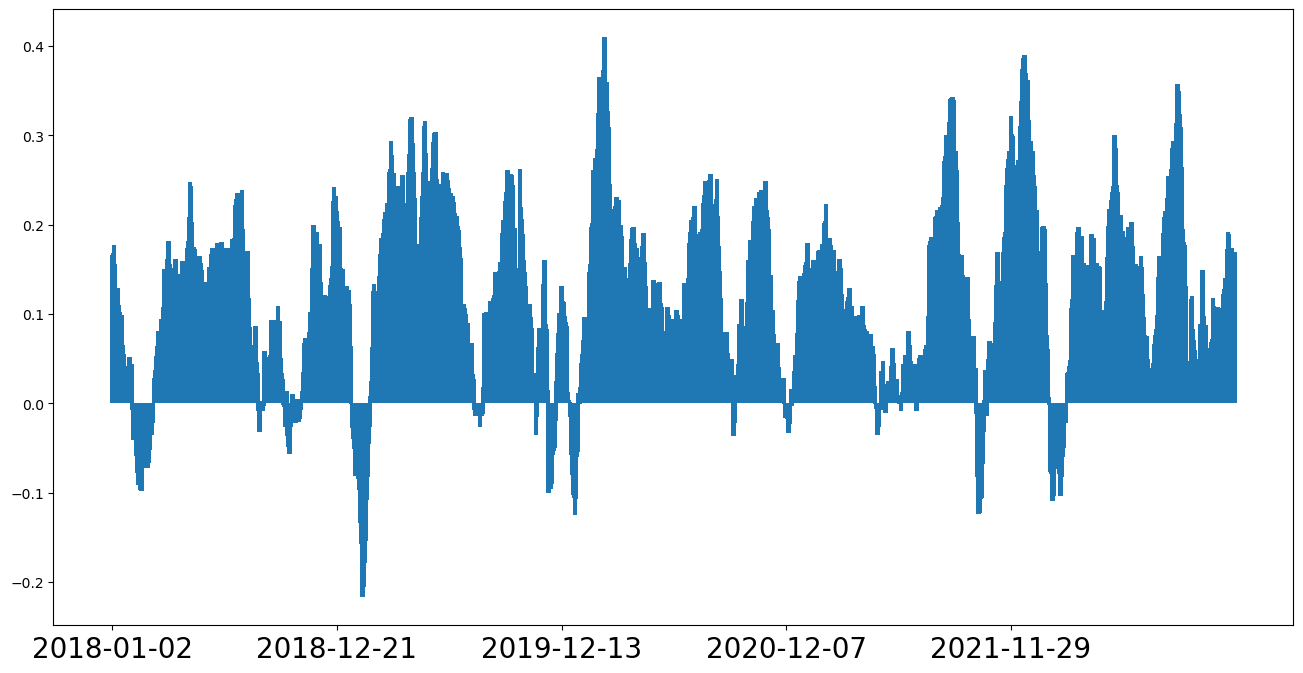

In [69]:
#画图
plt.rcParams['figure.figsize'] = (16.0, 8.0)
fig,ax = plt.subplots(1,1)
#坐标显示间隔
ax.bar(df_icr.dropna().index,df_icr.dropna().icr,width =5)
xticklabel = df_icr.dropna().index
xticks = np.arange(0,df_icr.dropna().shape[0],np.int((df_icr.dropna().shape[0]+1)/5))
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabel[xticks],size = 20)

In [149]:
#换仓日及每次换仓股票
##日期需变为date形式
price_match.index=pd.to_datetime(price_match.index)
df_factor.index=pd.to_datetime(df_return.index)
chg_datelist=df_factor.loc[df_factor.reset_index().groupby(df_factor.index.to_period('M'))['date'].max()].index
##持仓前100只股票
###按因子暴露升序排列，因为因子方向为负向
tradeStockdict=dict.fromkeys(df_factor.index)
for chg_date in chg_datelist:
    num=len(price_match.loc[chg_date,:].dropna())
    if num<=100:
        tradeStockdict[chg_date]=price_match.loc[chg_date,:].dropna().index
    else:
        tradeStockdict[chg_date]=df_factor.loc[chg_date,:].sort_values().iloc[:100].index
##填补同年同月份的持仓股票数据
for date in df_factor.index:
    for chg_date in chg_datelist:
        if (date.year==chg_date.year) and (date.month==chg_date.month):
            tradeStockdict[date]=tradeStockdict[chg_date]
#每只股票等权重持仓
##持仓价值
weight=1/100
positionValue=pd.DataFrame(index=df_factor.index,data=None)
for date in df_factor.index:    
    positionValue.loc[date,'positionValue']=price_match.loc[date,tradeStockdict[date]].sum()*0.01

In [179]:
#计算持仓累计净值图
positionValue['return']=(positionValue['positionValue'].shift(1)-positionValue['positionValue'])/positionValue['positionValue']
positionValue['acc_return']=(1 + positionValue['return']).cumprod()

C:\Users\user\AppData\Local\Temp\ipykernel_13572\1176278137.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xticks = np.arange(0,positionValue.shape[0],np.int((positionValue.shape[0]+1)/5))


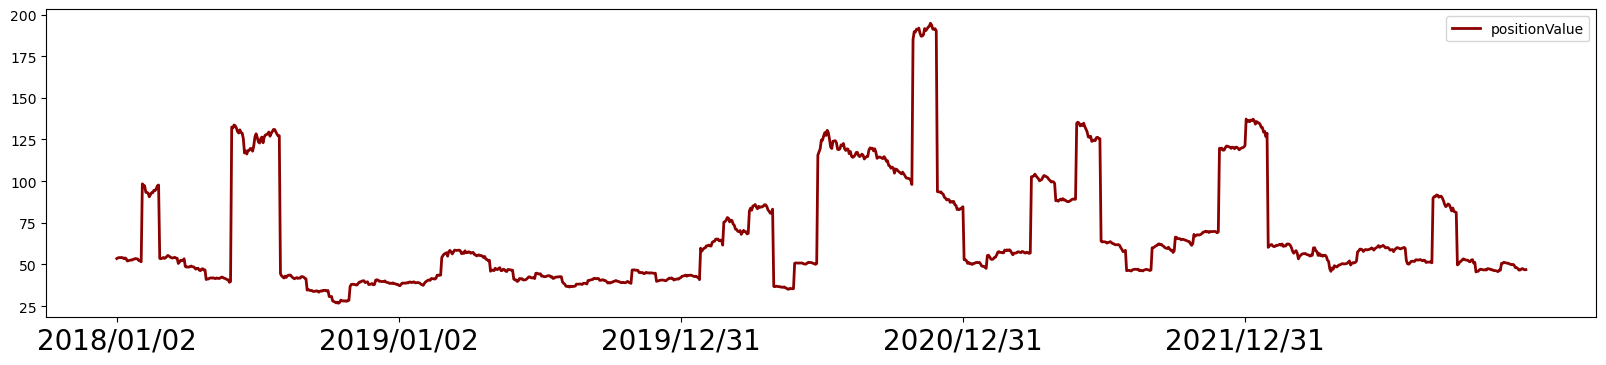

In [183]:
X = np.arange(positionValue.shape[0])
xticklabel = positionValue.index.strftime("%Y/%m/%d")
xticks = np.arange(0,positionValue.shape[0],np.int((positionValue.shape[0]+1)/5))

plt.figure(figsize = [20,4])

SP = plt.axes() 
p1 = SP.plot(X,positionValue['positionValue'],linewidth = 2,label = 'positionValue',color = 'darkred')


#设置坐标轴参数
SP.set_xticks(xticks)
SP.set_xticklabels(xticklabel[xticks],size = 20)

plt.legend()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13572\652447044.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xticks = np.arange(0,positionValue.shape[0],np.int((positionValue.shape[0]+1)/5))


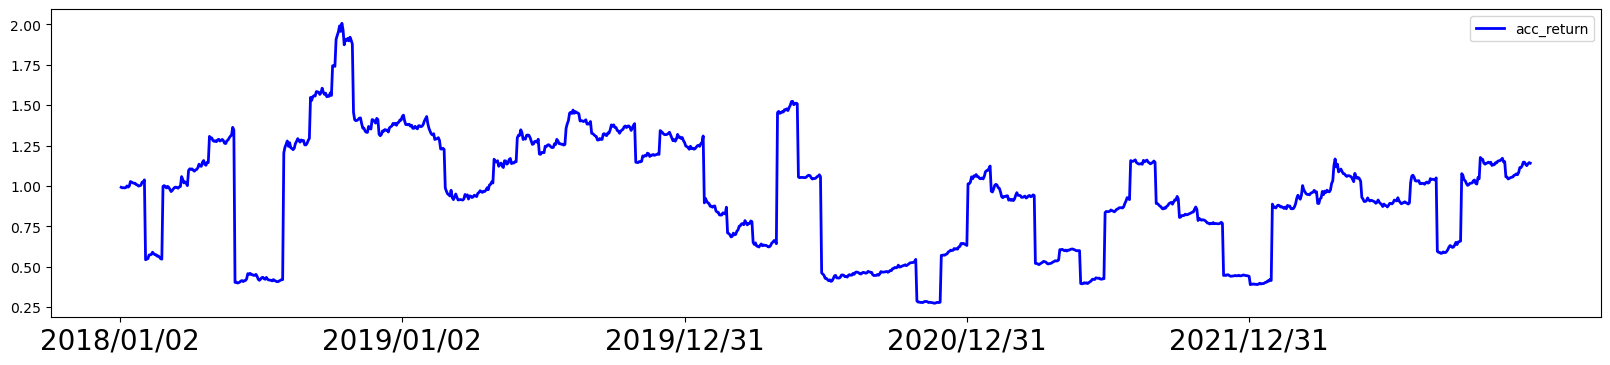

In [184]:
#画持仓累计净值图
X = np.arange(positionValue.shape[0])
xticklabel = positionValue.index.strftime("%Y/%m/%d")
xticks = np.arange(0,positionValue.shape[0],np.int((positionValue.shape[0]+1)/5))

plt.figure(figsize = [20,4])

SP1 = plt.axes() 
P1 = SP1.plot(X,positionValue['acc_return'],linewidth = 2,label = 'acc_return',color = 'b')


#设置坐标轴参数
SP1.set_xticks(xticks)
SP1.set_xticklabels(xticklabel[xticks],size = 20)

plt.legend()
plt.show()

In [ ]:
#未完成
##没有考虑手续费
##没有行业中性化
##没有全市场选股
##没有和benchmark对比收益
##没有封装策略